# PCA plots  

#### Example of how to use `%%R` magics in Jupyter  

Other examples:  

https://anaconda.org/ijstokes/demonstrating-rpy2-and-rmagic/notebook 
https://rpy2.github.io/doc/latest/html/interactive.html 
https://gist.github.com/simecek/019d87c55fec3839d95bbf8489dde61d 

#### Imports & config

In [1]:
import rpy2

rpy2.__version__

'3.4.2'

In [2]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')

%config InlineBackend.figure_format ='retina'
%load_ext rpy2.ipython

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Specify Input & Output files

In [3]:
## 1000 Genomes Populations config input file
file_1000g_pop = '/Users/elisabethmlynarski/repos/bitbucket/psp_hg38_wes_dev/data_20504_2020-0626/PLINK/eigenstrat_1000G_common/pop_input_1000G/colortext-1000G_superpop_sort.txt'

## PCA file
file_pca = '/Users/elisabethmlynarski/repos/bitbucket/psp_hg38_wes_dev/data_20504_2020-0626/PLINK/eigenstrat_1000G_common/05_pca_1000G/post_PCA/psp_adsp-1000G_PCA-plot_data.txt'


#### Read in input files --> Pandas DataFrames

In [4]:
## read files --> Pandas DF
df_1000g_pop = pd.read_csv(file_1000g_pop, sep='\t')
df_pca = pd.read_csv(file_pca, sep='\t')


#### R plot variable setup

In [5]:
## set up Superpopulation DF for summary legend
superpop_df = df_1000g_pop[['Superpopulation', 'Color']].drop_duplicates().reset_index(drop=True)
superpop_df['Pch'] = 16
superpop_df['Cex'] = 1.0
superpop_df['Superpopulation'] = superpop_df['Superpopulation'].str.replace(" Ancestry", "")
superpop_df['Superpopulation'] = superpop_df['Superpopulation'].str.replace("Input case subjects", "CASE")
superpop_df['Superpopulation'] = superpop_df['Superpopulation'].str.replace("Input control subjects", "CTRL")


### R plot functions  

Use `%%R` cell magic  
* output = plotPCs function

In [6]:
%%R -o plotPCs

## copied directly from Rscript:
plotPCs<-function(df_plot, df_superpop, pcX, pcY, title){
  par(xpd=TRUE)
  plot(df_plot[,c(pcX, pcY)], 
       col=df_plot$COL, 
       pch=df_plot$Pch, 
       cex=df_plot$Cex, 
       xlab=pcX, 
       ylab=pcY, 
       main=paste(title, ": ", pcX, " vs ", pcY, sep = '')
      ) 
    legend(legend=df_superpop$Superpopulation, 
           col=df_superpop$Color, 
           pch=16, 
           pt.cex=1, cex=0.6, 
           horiz=TRUE, "top", 
           inset=c(0,-0.05), 
           bty="n", 
           xjust=0.5
          )
}

<br>  

### Display plots from R function  

* inputs: dataframes + R function

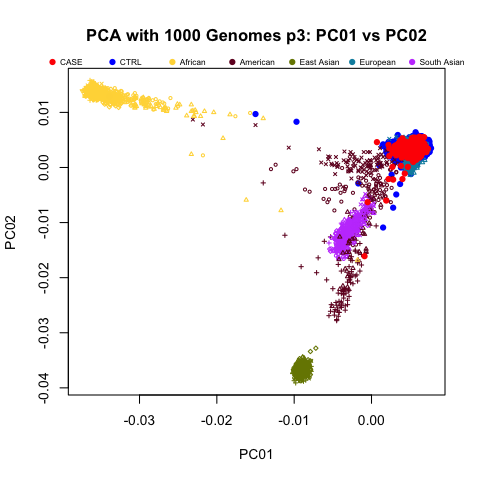

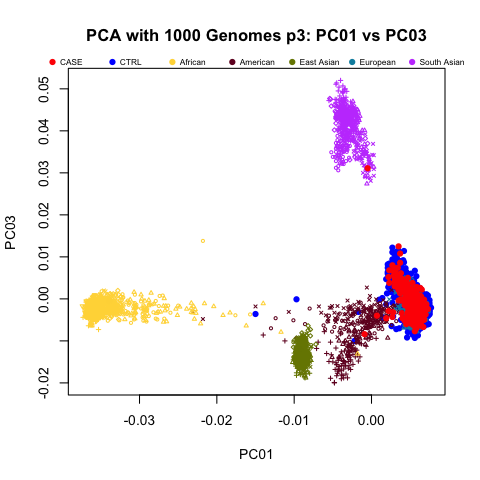

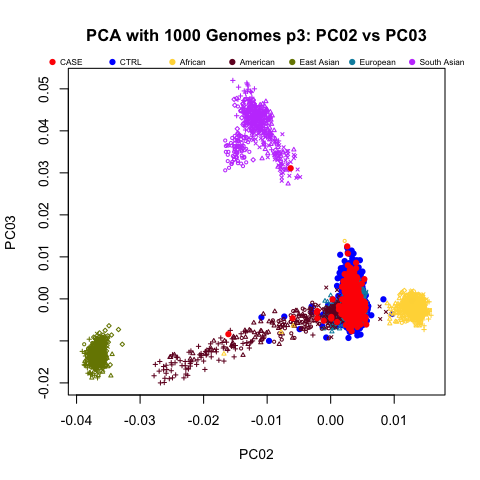

In [7]:
%%R -i df_pca -i superpop_df -i plotPCs -r 100 -p 10

plotPCs(df_plot=df_pca, df_superpop=superpop_df, 
        pcX="PC01", pcY="PC02", title="PCA with 1000 Genomes p3")

plotPCs(df_plot=df_pca, df_superpop=superpop_df, 
        pcX="PC01", pcY="PC03", title="PCA with 1000 Genomes p3")

plotPCs(df_plot=df_pca, df_superpop=superpop_df, 
        pcX="PC02", pcY="PC03", title="PCA with 1000 Genomes p3")
